- Recency：最近一次消费，即上一次交易距今多少天，反应了用户是否流失；
- Frequency：消费频率，一段时间内用户的消费频率，反应了用户的消费活跃度；
- Monetary：消费金额，一段时间内用户消费总金额，反应了用户价值。

[根据 RFM 这 3 个维度可以将用户分为 8 种：](https://media-image1.baydn.com/storage_media_image/srfeae/5ae0f281fb756b611af4ea4b60ea4564.493dd891a1f076bc992bcf0255c5c033.jpg?x-oss-process=image/quality,q_80)

In [5]:
import pandas as pd
df = pd.read_csv('https://media-zip1.baydn.com/storage_media_zip/srfeae/bf6dc7d814c520c60e5e632d281f14a4.ba163c25251bd44b74bde1bb4af7abdc.csv')
df

,订单日期,用户名,订单金额
0,2019-01-01,杜汇,71
1,2019-01-01,钟群,157
2,2019-01-01,贺媚,163
3,2019-01-01,许菲,38
4,2019-01-01,罗姿,302
...,...,...,...
1687,2019-12-30,万健,696
1688,2019-12-31,江姣,35
1689,2019-12-31,许友,467
1690,2019-12-31,杨妶,209


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   订单日期    1692 non-null   object
 1   用户名     1692 non-null   object
 2   订单金额    1692 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 39.8+ KB


In [4]:
df.describe()

,订单金额
count,1692.000000
mean,433.797281
std,895.133325
min,1.000000
25%,36.000000
50%,148.000000
75%,478.000000
max,14052.000000


In [9]:
df['订单日期'] = pd.to_datetime(df['订单日期'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单日期    1692 non-null   datetime64[ns]
 1   用户名     1692 non-null   object        
 2   订单金额    1692 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 39.8+ KB


2019-12-31 和 2019-12-01 相差多少天

In [10]:
(pd.to_datetime('2019-12-31') - pd.to_datetime('2019-12-01')).days  # 30

30

In [14]:
df_rfm = df.groupby('用户名').agg({
  '订单日期': lambda x: (pd.to_datetime('2019-12-31') - x.max()).days,  # 计算 R
  '用户名': lambda x: len(x),  # 计算 F
  '订单金额': lambda x: x.sum()  # 计算 M
})
df_rfm

,订单日期,用户名,订单金额
用户名,,,
丁元,57,1,1873
丁发,180,1,4151
丁和,25,3,1109
丁妹,37,2,2271
丁学,41,5,2291
...,...,...,...
龙茜,131,1,267
龚以,162,1,467
龚妹,126,3,243


In [16]:
df_rfm.rename(columns={'订单日期': 'R', '用户名': 'F', '订单金额': 'M'}, inplace=True)
df_rfm

,R,F,M
用户名,,,
丁元,57,1,1873
丁发,180,1,4151
丁和,25,3,1109
丁妹,37,2,2271
丁学,41,5,2291
...,...,...,...
龙茜,131,1,267
龚以,162,1,467
龚妹,126,3,243


In [17]:
df[df['用户名'] == '丁和']

,订单日期,用户名,订单金额
476,2019-05-31,丁和,38
673,2019-07-21,丁和,736
1522,2019-12-06,丁和,335


In [19]:
def r_score(x):
  if x <= 29:
    return 4
  elif x <= 58:
    return 3
  elif x <= 119:
    return 2
  else:
    return 1

def f_score(x):
  if x <= 1:
    return 1
  elif x <= 2:
    return 2
  elif x <= 3:
    return 3
  else:
    return 4

def m_score(x):
  if x <= 204:
    return 1
  elif x <= 606:
    return 2
  elif x <= 1334:
    return 3
  else:
    return 4

df_rfm['r_score'] = df_rfm['R'].apply(r_score)
df_rfm['f_score'] = df_rfm['F'].apply(f_score)
df_rfm['m_score'] = df_rfm['M'].apply(m_score)

print(df_rfm.head())

       R  F     M  r_score  f_score  m_score
用户名                                         
丁元    57  1  1873        3        1        4
丁发   180  1  4151        1        1        4
丁和    25  3  1109        4        3        3
丁妹    37  2  2271        3        2        4
丁学    41  5  2291        3        4        4


In [20]:
df_rfm['R高低'] = df_rfm['r_score'].apply(lambda x: '高' if x > df_rfm['r_score'].mean() else '低')
df_rfm['F高低'] = df_rfm['f_score'].apply(lambda x: '高' if x > df_rfm['f_score'].mean() else '低')
df_rfm['M高低'] = df_rfm['m_score'].apply(lambda x: '高' if x > df_rfm['m_score'].mean() else '低')

In [21]:
df_rfm['RFM'] = df_rfm['R高低'] + df_rfm['F高低'] + df_rfm['M高低']

In [22]:
def rfm_type(x):
  if x == '高高高':
    return '重要价值用户'
  elif x == '低高高':
    return '重要唤回用户'
  elif x == '高低高':
    return '重要深耕用户'
  elif x == '低低高':
    return '重要挽留用户'
  elif x == '高高低':
    return '潜力用户'
  elif x == '高低低':
    return '新用户'
  elif x == '低高低':
    return '一般维持用户'
  elif x == '低低低':
    return '流失用户'

df_rfm['用户类型'] = df_rfm['RFM'].apply(rfm_type)

In [23]:
df_rfm

,R,F,M,r_score,f_score,m_score,R高低,F高低,M高低,RFM,用户类型
用户名,,,,,,,,,,,
丁元,57,1,1873,3,1,4,高,低,高,高低高,重要深耕用户
丁发,180,1,4151,1,1,4,低,低,高,低低高,重要挽留用户
丁和,25,3,1109,4,3,3,高,高,高,高高高,重要价值用户
丁妹,37,2,2271,3,2,4,高,低,高,高低高,重要深耕用户
丁学,41,5,2291,3,4,4,高,高,高,高高高,重要价值用户
...,...,...,...,...,...,...,...,...,...,...,...
龙茜,131,1,267,1,1,2,低,低,低,低低低,流失用户
龚以,162,1,467,1,1,2,低,低,低,低低低,流失用户
龚妹,126,3,243,1,3,2,低,高,低,低高低,一般维持用户


In [24]:
df_rfm['用户类型'].value_counts()

流失用户      164
重要价值用户    138
新用户        86
重要深耕用户     75
重要挽留用户     75
重要唤回用户     57
潜力用户       56
一般维持用户     42
Name: 用户类型, dtype: int64

In [25]:
df_count = df_rfm['用户类型'].value_counts().reset_index()

value_counts() 方法返回的数据类型是 Series，左边是数据标签（索引），右边是对应的数据。我们可以使用 reset_index() 方法将现有的数据标签（索引）变成数据，并使用默认的数字索引（从 0 开始）作为新的索引。简单来说就是 reset_index() 方法将 Series 变成了 DataFrame。

In [26]:
df_count.rename(columns={'index': '用户类型', '用户类型': '人数'}, inplace=True)

In [27]:
df_count

,用户类型,人数
0,流失用户,164
1,重要价值用户,138
2,新用户,86
3,重要深耕用户,75
4,重要挽留用户,75
5,重要唤回用户,57
6,潜力用户,56
7,一般维持用户,42


In [28]:
df_count['占比'] = df_count['人数'] / df_count['人数'].sum()  # 人数/总人数

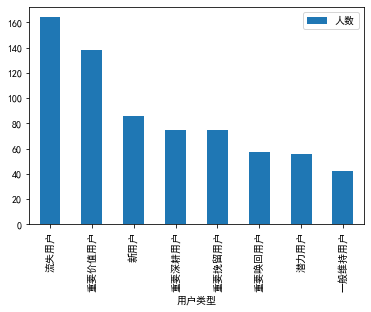

In [31]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['SimHei']
df_count.plot(kind='bar', x='用户类型', y=['人数'])
plt.show()  # 需要提前 import matplotlib.pyplot as plt

使用 pandas 中的 plot() 方法即可将我们的数据快速的进行可视化，它的参数有很多，这里只介绍几个常用的。

- kind：图表类型，默认为 line（折线图）。还可以设置为 bar（柱状图）、barh（水平柱状图）、hist（直方图）、box（箱形图）、kde（核密度估计图）、area（面积图）、pie（饼图）、scatter（散点图）和 hexbin（六边形图）；
- x：x 轴数据，即横轴数据；
- y：y 轴数据，即纵轴数据，可以设置多个。

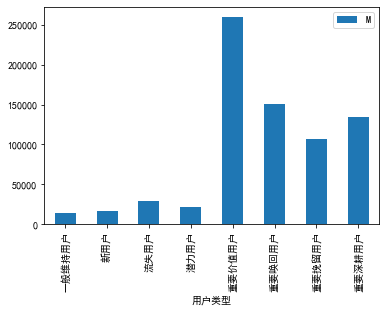

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family']=['SimHei']
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# 读取订单表格数据
df = pd.read_csv('https://media-zip1.baydn.com/storage_media_zip/srfeae/bf6dc7d814c520c60e5e632d281f14a4.ba163c25251bd44b74bde1bb4af7abdc.csv')
# 将订单日期转为日期格式
df['订单日期'] = pd.to_datetime(df['订单日期'])
# 计算 RFM
df_rfm = df.groupby('用户名').agg({
    '订单日期': lambda x: (pd.to_datetime('2019-12-31') - x.max()).days,  # 计算 R
    '用户名': lambda x: len(x),  # 计算 F
    '订单金额': lambda x: x.sum()  # 计算 M
})
# 列名重命名
df_rfm.rename(columns={'订单日期': 'R', '用户名': 'F', '订单金额': 'M'}, inplace=True)

def r_score(x):
  if x <= 29:
    return 4
  elif x <= 58:
    return 3
  elif x <= 119:
    return 2
  else:
    return 1

def f_score(x):
  if x <= 1:
    return 1
  elif x <= 2:
    return 2
  elif x <= 3:
    return 3
  else:
    return 4

def m_score(x):
  if x <= 204:
    return 1
  elif x <= 606:
    return 2
  elif x <= 1334:
    return 3
  else:
    return 4

df_rfm['r_score'] = df_rfm['R'].apply(r_score)
df_rfm['f_score'] = df_rfm['F'].apply(f_score)
df_rfm['m_score'] = df_rfm['M'].apply(m_score)

df_rfm['R高低'] = df_rfm['r_score'].apply(lambda x: '高' if x > df_rfm['r_score'].mean() else '低')
df_rfm['F高低'] = df_rfm['f_score'].apply(lambda x: '高' if x > df_rfm['f_score'].mean() else '低')
df_rfm['M高低'] = df_rfm['m_score'].apply(lambda x: '高' if x > df_rfm['m_score'].mean() else '低')

df_rfm['RFM'] = df_rfm['R高低'] + df_rfm['F高低'] + df_rfm['M高低']

def rfm_type(x):
  if x == '高高高':
    return '重要价值用户'
  elif x == '低高高':
    return '重要唤回用户'
  elif x == '高低高':
    return '重要深耕用户'
  elif x == '低低高':
    return '重要挽留用户'
  elif x == '高高低':
    return '潜力用户'
  elif x == '高低低':
    return '新用户'
  elif x == '低高低':
    return '一般维持用户'
  elif x == '低低低':
    return '流失用户'

# 给用户打标签
df_rfm['用户类型'] = df_rfm['RFM'].apply(rfm_type)
df_monetary=df_rfm.groupby('用户类型')['M'].sum().reset_index()
df_monetary.plot(kind='bar',x='用户类型',y=['M'])
plt.show()
